# Weather Reports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

2024-04-18 08:23:51.514549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 08:23:51.514600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 08:23:51.598333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 08:23:51.711358: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
models = [
    tf.keras.models.load_model(f"/home/cse479/ikollipara/weather/model_{idx+1}.keras")
    for idx in range(4)
]
histories = [
    np.load(f"/home/cse479/ikollipara/weather/history_{idx+1}.npy", allow_pickle=True)
    for idx in range(4)
]

scores = pd.read_csv("/home/cse479/ikollipara/weather/scores.csv").rename(index={0: 'loss', 1: 'accuracy'}).drop(columns=['Unnamed: 0'])

## Plotting the Weather Training Results

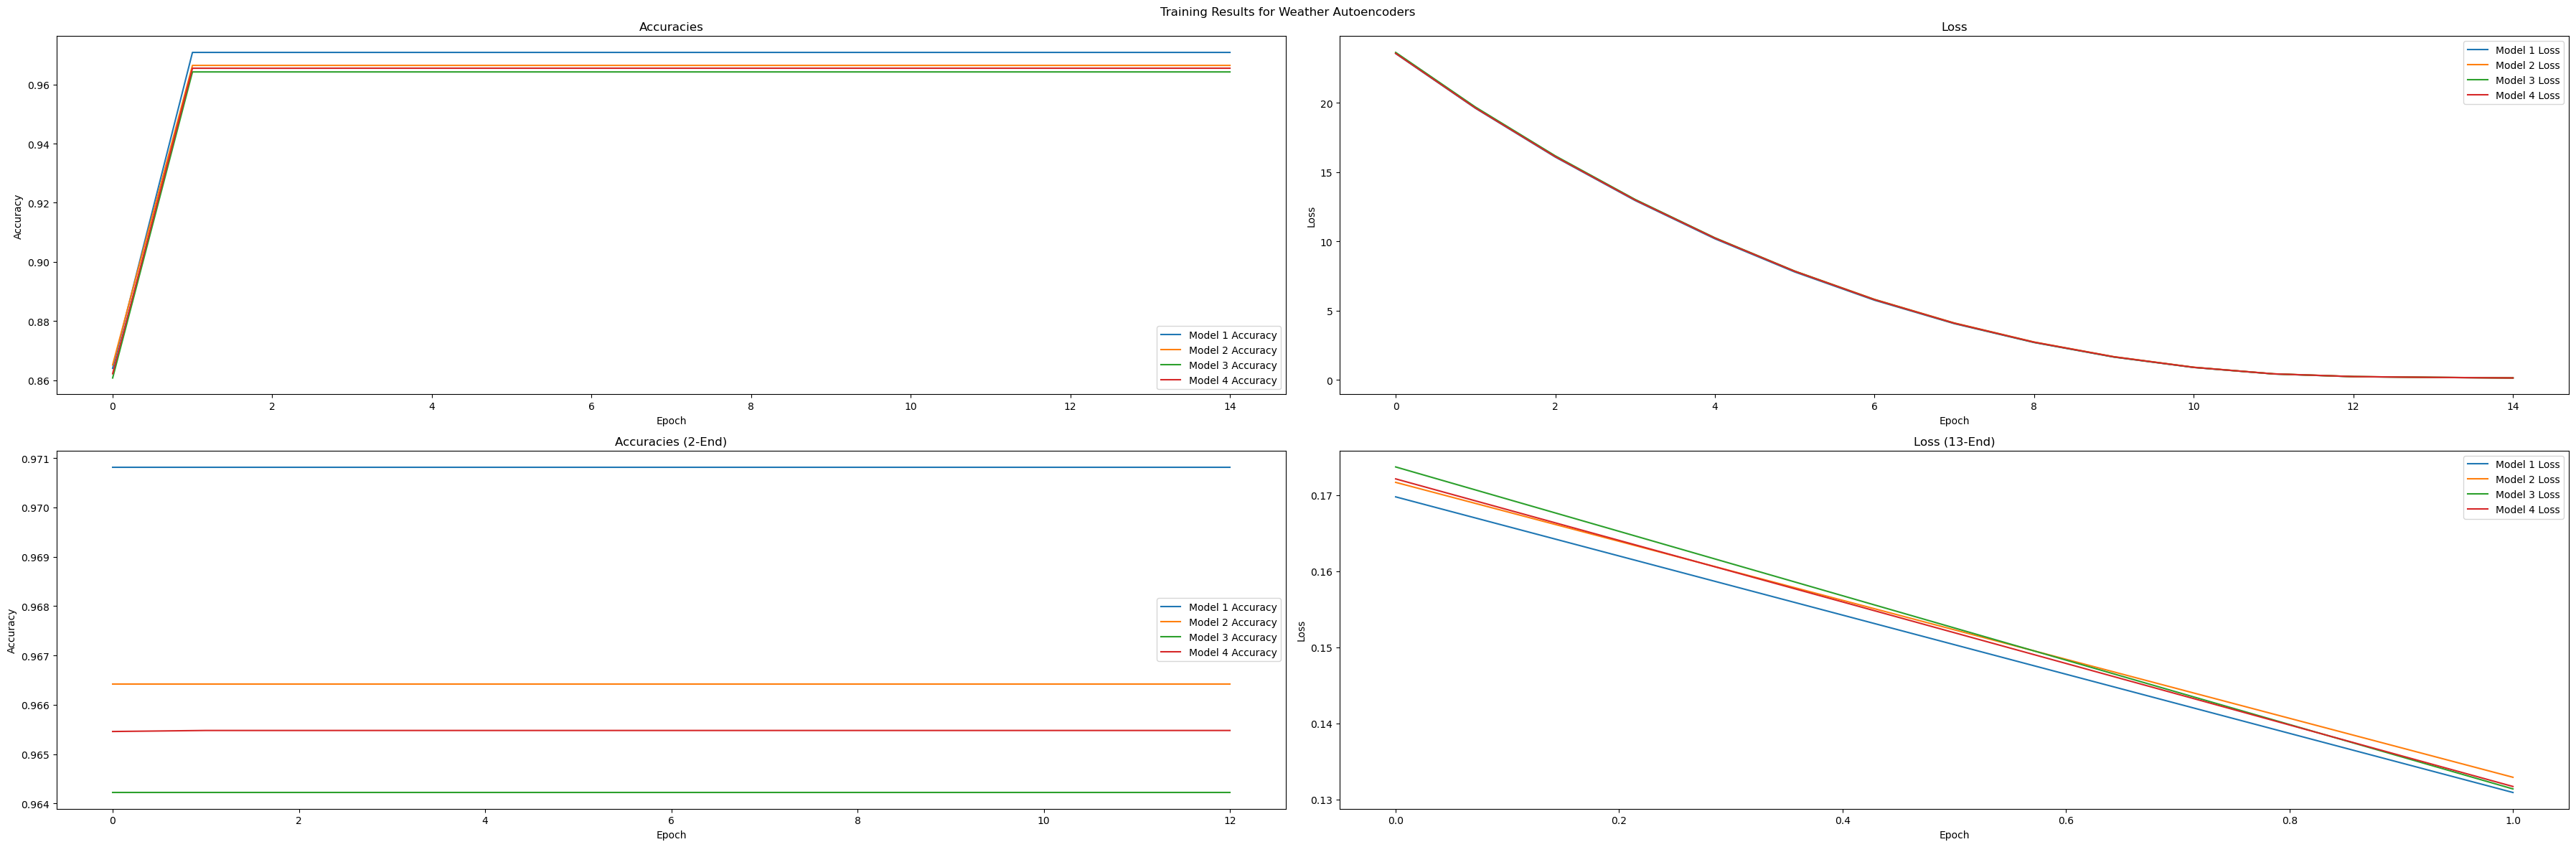

In [3]:
plt.figure(figsize=(36,12))
plt.suptitle(f"Training Results for Weather Autoencoders")

plt.subplot(2,2,1)
plt.title("Accuracies")
for idx, history in enumerate(histories):
    accuracy = history.item()['accuracy']
    plt.plot(accuracy, label=f"Model {idx+1} Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,2,2)
plt.title("Loss")
for idx, history in enumerate(histories):
    loss = history.item()['loss']
    plt.plot(loss, label=f"Model {idx+1} Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2,2,3)
plt.title("Accuracies (2-End)")
for idx, history in enumerate(histories):
    accuracy = history.item()['accuracy'][2:]
    plt.plot(accuracy, label=f"Model {idx+1} Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,2,4)
plt.title("Loss (13-End)")
for idx, history in enumerate(histories):
    loss = history.item()['loss'][13:]
    plt.plot(loss, label=f"Model {idx+1} Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()
plt.show()

Text(0, 0.5, 'Loss (MSE)')

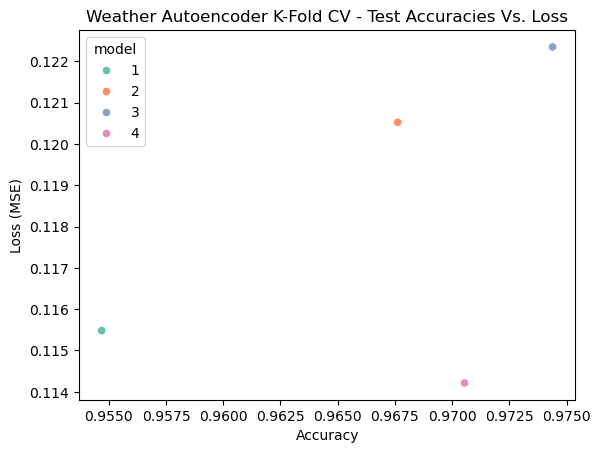

In [4]:
scores_t = scores.transpose()
scores_t['model'] = range(1, 5)
sns.scatterplot(scores_t, y="loss", x="accuracy", hue="model", palette="Set2")
plt.title("Weather Autoencoder K-Fold CV - Test Accuracies Vs. Loss")
plt.xlabel("Accuracy")
plt.ylabel("Loss (MSE)")

The best performing model on the training set was Model 1, but the best performing model on the test set was Model 4. I vote model 2 for the autoencoder. As seen in the above graph, the point farthest right and lowest is the best on the test set. 

In [5]:
models[1].summary()
for layer in models[1].layers:
    layer.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 150)               802454    
                                                                 
 sequential_4 (Sequential)   (None, 15695, 7)          929799    
                                                                 
Total params: 1732253 (6.61 MB)
Trainable params: 1732253 (6.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 15695, 256)        105216    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 15695, 256)        29644